## CP13

In [1]:
import tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 14

In [4]:
#import data
data_Zj = pd.read_csv('Zjets.csv')

In [5]:
data_Db = pd.read_csv('Diboson.csv')

In [6]:
data_top = pd.read_csv('Top.csv')

In [7]:
data_ggH = pd.read_csv('ggH1000.csv')

In [8]:
data_Zj.drop(data_Zj.columns[0], axis=1, inplace=True)
data_Db.drop(data_Db.columns[0], axis=1, inplace=True)
data_top.drop(data_top.columns[0], axis=1, inplace=True)
data_ggH.drop(data_ggH.columns[0], axis=1, inplace=True)

In [9]:
data_Zj.head(5)

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,-0.790471,177227.420,1,95697.766,64252.690,0.097862,1.895164,425871.88,-1.329446,-0.485957,...,1.782276,-1.057460,76128.370,12476.566,1,-0.289019,1.966965,11973.011,596020.44,-1.0
1,0.789204,10660.757,1,90289.914,32506.705,0.000000,0.000000,247948.36,-0.429050,2.770810,...,-0.918399,-1.229385,40799.945,38147.754,1,0.847265,0.995251,27624.867,260357.19,-1.0
2,-0.872639,655334.400,1,92994.430,55287.625,0.059006,2.463149,630492.94,-0.543789,-2.190247,...,-1.091297,0.865696,57988.660,29768.775,1,0.440004,-1.042492,27102.590,422698.44,-1.0
3,-0.772697,41489.973,1,89607.580,63405.484,0.265080,2.081222,610611.56,1.776149,-0.214862,...,1.238367,2.127853,55424.742,69817.470,1,0.809497,-2.276664,51873.030,302718.06,-1.0
4,1.581337,41731.630,1,90199.480,47187.332,0.093765,2.321676,781746.90,-1.524169,-1.101946,...,-0.116431,1.745413,68312.220,33509.810,1,0.598434,-1.972788,28290.979,461896.25,-1.0


- lep1 pt transverse momentum of first reconstructed lepton (in MeV/c)
- lep2 pt transverse momentum of second reconstructed lepton (in MeV/c)
- fatjet pt transverse momentum of reconstructed fat-jet (in MeV/c)
- fatjet eta η of reconstructed fat-jet
- fatjet D2 D2 of reconstructed fat-jet
- Zll mass invariant mass of reconstructed dilepton system (in MeV/c
- Zll pt transverse momentum of reconstructed dilepton system (in MeV/c)
- MET transverse missing energy in reconstructed event (in MeV)
- reco zv mass invariant mass of reconstructed dilepton-plus-fatjet
- isSignal boolean flag: 0 for background, 1 for signal

In [10]:
data_Zj.drop(data_Zj.columns[0:1], axis=1, inplace=True)

### TASK 1

In [11]:
#pick only the 10 variables defined above
bkg_Zj = data_Zj[['lep1_pt','lep2_pt','fatjet_pt','fatjet_eta','fatjet_D2','Zll_mass','Zll_pt','MET','reco_zv_mass','isSignal']]

In [12]:
bkg_Db = data_Db[['lep1_pt','lep2_pt','fatjet_pt','fatjet_eta','fatjet_D2','Zll_mass','Zll_pt','MET','reco_zv_mass','isSignal']]

In [13]:
bkg_top = data_top[['lep1_pt','lep2_pt','fatjet_pt','fatjet_eta','fatjet_D2','Zll_mass','Zll_pt','MET','reco_zv_mass','isSignal']]

In [14]:
sig_H = data_ggH[['lep1_pt','lep2_pt','fatjet_pt','fatjet_eta','fatjet_D2','Zll_mass','Zll_pt','MET','reco_zv_mass','isSignal']]

In [15]:
pd.DataFrame(bkg_Db)

,lep1_pt,lep2_pt,fatjet_pt,fatjet_eta,fatjet_D2,Zll_mass,Zll_pt,MET,reco_zv_mass,isSignal
0,369495.34,9755.2705,345940.12,-0.001591,1.786927,187549.810,374316.600,41920.540,1014320.10,0
1,36972.74,14584.7360,218057.10,-1.066937,2.296220,13106.807,51429.535,225618.530,240295.97,0
2,146895.95,19119.7030,274339.25,0.704825,3.360730,84519.230,153790.270,42284.125,471285.40,0
3,109699.72,8277.4480,444837.44,0.095546,0.702838,76138.640,102611.836,42735.938,495503.10,0
4,151453.40,13848.2230,250422.77,-1.828396,3.634348,86138.000,141886.280,70475.780,498823.40,0
...,...,...,...,...,...,...,...,...,...,...
155122,283306.94,105404.0300,314907.50,-0.243280,2.272613,92276.210,388667.220,34947.470,892692.50,0
155123,155581.62,28403.3550,213465.28,0.259194,1.041742,93107.820,179436.360,19106.367,432389.25,0
155124,171423.12,20992.8140,226428.62,1.589993,2.054467,84828.270,179159.830,38156.280,492761.16,0
155125,169340.69,104497.2340,209074.34,1.065788,1.414945,92704.195,273647.400,102332.290,534846.80,0


In [16]:
pd.DataFrame(bkg_Zj)

,lep1_pt,lep2_pt,fatjet_pt,fatjet_eta,fatjet_D2,Zll_mass,Zll_pt,MET,reco_zv_mass,isSignal
0,76128.370,11973.011,210397.60,-1.329446,1.895164,95697.766,64252.690,177227.420,596020.44,0
1,40799.945,27624.867,226681.30,-0.429050,0.000000,90289.914,32506.705,10660.757,260357.19,0
2,57988.660,27102.590,547212.70,-0.543789,2.463149,92994.430,55287.625,655334.400,422698.44,0
3,55424.742,51873.030,200684.47,1.776149,2.081222,89607.580,63405.484,41489.973,302718.06,0
4,68312.220,28290.979,324990.97,-1.524169,2.321676,90199.480,47187.332,41731.630,461896.25,0
...,...,...,...,...,...,...,...,...,...,...
6579411,152841.810,63417.707,234758.52,-1.775256,2.056942,67672.120,207361.190,82354.960,594789.10,0
6579412,78863.380,40085.740,262564.80,-0.046267,2.163246,38196.727,114521.740,165134.640,425267.30,0
6579413,87776.020,28002.738,345795.50,1.868530,1.367174,25053.380,114840.290,286209.000,493590.40,0
6579414,198423.470,14492.714,305589.78,1.087642,3.705049,52209.746,209460.080,69904.350,508649.44,0


In [17]:
sig_H

,lep1_pt,lep2_pt,fatjet_pt,fatjet_eta,fatjet_D2,Zll_mass,Zll_pt,MET,reco_zv_mass,isSignal
0,320104.62,312638.44,480641.84,-0.851387,0.889354,87475.550,627990.80,44495.770,1063465.80,1
1,288589.78,129548.62,375352.78,1.041311,1.485706,90507.310,409780.94,34441.156,974210.75,1
2,228625.23,118590.28,555879.20,0.417858,1.219367,89765.850,344668.30,21625.379,996837.40,1
3,302502.84,233439.89,430646.20,0.438590,0.592705,92313.630,535629.06,21855.973,989655.56,1
4,224785.02,76205.98,244348.40,1.213717,0.724910,89451.920,296257.47,33677.380,993398.30,1
...,...,...,...,...,...,...,...,...,...,...
50008,281285.56,188722.19,485725.50,1.350267,0.492475,91455.810,462688.16,25252.414,1054015.90,1
50009,292794.56,76524.93,442907.28,-1.504514,1.347116,78827.555,360947.12,29533.623,875460.00,1
50010,423855.97,202405.75,227088.28,-0.375119,0.651775,95176.640,621877.06,48633.637,963595.50,1
50011,333331.06,84810.95,450385.88,-0.582446,1.003607,89887.110,417055.56,11857.587,978088.25,1


In [18]:
bkg_Db

,lep1_pt,lep2_pt,fatjet_pt,fatjet_eta,fatjet_D2,Zll_mass,Zll_pt,MET,reco_zv_mass,isSignal
0,369495.34,9755.2705,345940.12,-0.001591,1.786927,187549.810,374316.600,41920.540,1014320.10,0
1,36972.74,14584.7360,218057.10,-1.066937,2.296220,13106.807,51429.535,225618.530,240295.97,0
2,146895.95,19119.7030,274339.25,0.704825,3.360730,84519.230,153790.270,42284.125,471285.40,0
3,109699.72,8277.4480,444837.44,0.095546,0.702838,76138.640,102611.836,42735.938,495503.10,0
4,151453.40,13848.2230,250422.77,-1.828396,3.634348,86138.000,141886.280,70475.780,498823.40,0
...,...,...,...,...,...,...,...,...,...,...
155122,283306.94,105404.0300,314907.50,-0.243280,2.272613,92276.210,388667.220,34947.470,892692.50,0
155123,155581.62,28403.3550,213465.28,0.259194,1.041742,93107.820,179436.360,19106.367,432389.25,0
155124,171423.12,20992.8140,226428.62,1.589993,2.054467,84828.270,179159.830,38156.280,492761.16,0
155125,169340.69,104497.2340,209074.34,1.065788,1.414945,92704.195,273647.400,102332.290,534846.80,0


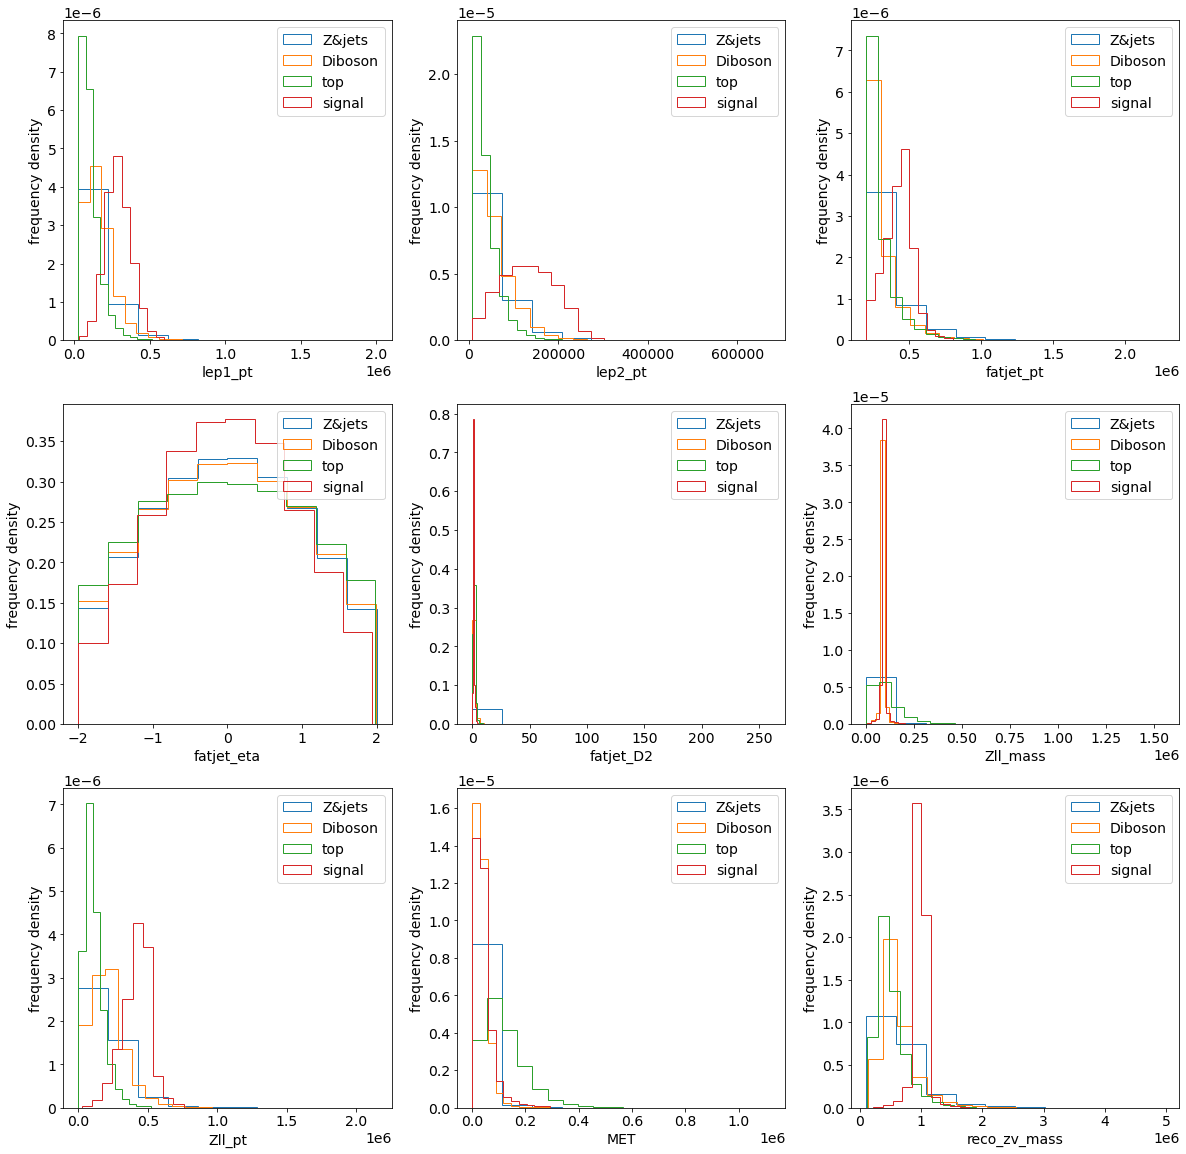

In [19]:
#create histogram for all four signals for each variable
figs, axs = plt.subplots(3, 3, figsize = (20,20))
column_names = ['lep1_pt','lep2_pt','fatjet_pt','fatjet_eta','fatjet_D2','Zll_mass','Zll_pt','MET','reco_zv_mass','isSignal']
count = 0
for i in range(3):
    for j in range(3):
        col = column_names[count]
        
        bkg1 = bkg_Zj.sort_values(by=[col])
        bkg2 = bkg_Db.sort_values(by=[col])
        bkg3 = bkg_top.sort_values(by=[col])
        sig1 = sig_H.sort_values(by=[col])
        
        
        axs[i,j].hist(bkg1[col][:-200],histtype='step', density=True, label='Z&jets')
        axs[i,j].hist(bkg2[col][:-200],histtype='step', density=True, label='Diboson')
        axs[i,j].hist(bkg3[col][:-200],histtype='step', density=True, label='top')
        axs[i,j].hist(sig1[col][:-200],histtype='step', density=True, label='signal')
        axs[i,j].legend()
        axs[i,j].set_xlabel(col)
        axs[i,j].set_ylabel('frequency density')
        count += 1

#plt.subplots_adjust(hspace=0.8)
#plt.show()

### TASK 2

In [20]:
#get backgrounds all together and shuffle
backgrounds = pd.concat([bkg_Zj, bkg_Db, bkg_top], ignore_index=True)

In [21]:
import sklearn

In [22]:
backgrounds = sklearn.utils.shuffle(backgrounds, random_state=42, n_samples=None)

In [23]:
backgrounds.reset_index(drop=True)

,lep1_pt,lep2_pt,fatjet_pt,fatjet_eta,fatjet_D2,Zll_mass,Zll_pt,MET,reco_zv_mass,isSignal
0,232483.110,78097.500,307724.47,-0.839652,0.000000,93602.280,310053.120,20759.258,1025235.44,0
1,139438.390,10871.887,376992.88,0.361917,3.182459,92195.430,138343.690,27072.012,516379.78,0
2,228254.280,75989.010,387181.84,0.262701,40.239880,100442.380,296552.780,33679.860,695326.20,0
3,40185.773,32900.516,237391.14,-0.254447,1.715254,52588.004,50827.234,66781.000,230146.30,0
4,292358.400,83311.850,370170.75,-0.222120,4.155993,87515.050,369603.780,9488.808,833604.30,0
...,...,...,...,...,...,...,...,...,...,...
6826954,146502.120,70188.840,335736.84,0.441164,0.000000,91211.060,211395.500,18662.895,957661.50,0
6826955,253629.270,219878.200,344363.60,0.733743,1.776059,75625.410,473026.280,14006.627,1056602.80,0
6826956,29122.828,24143.043,347928.28,-0.010198,1.648280,40241.805,50883.200,69248.280,323494.10,0
6826957,419320.250,41684.137,365756.78,-1.659754,5.556878,105658.680,457001.340,62174.080,872322.06,0


In [24]:
len(sig_H)

50013

In [25]:
#get number of background samples as the same number of signal samples
bkg_samples = sklearn.utils.shuffle(backgrounds, random_state=42, n_samples=len(sig_H))

In [28]:
training = pd.concat([sig_H, bkg_samples], ignore_index=True)

In [29]:
training = sklearn.utils.shuffle(training, random_state=42)

In [30]:
training

,lep1_pt,lep2_pt,fatjet_pt,fatjet_eta,fatjet_D2,Zll_mass,Zll_pt,MET,reco_zv_mass,isSignal
39389,236095.83,223591.6700,471153.53,-1.278958,1.428814,85647.080,451638.40,32944.5600,954156.40,1
32431,280150.56,232889.7800,450749.06,-0.891372,0.625325,89382.484,506066.84,15525.5140,976539.25,1
69018,292778.30,7139.7744,223536.55,-0.006066,2.369304,98248.234,299659.40,47393.0900,536788.75,0
49834,303353.16,170069.7800,496729.30,-0.595946,0.711557,89189.390,473213.72,57355.2800,986375.30,1
76027,199660.81,43907.5500,763084.60,0.982800,1.443126,86146.016,229531.94,70204.8050,1059215.20,0
...,...,...,...,...,...,...,...,...,...,...
6265,390174.34,70919.0300,436243.97,-0.072294,0.359615,108599.360,450300.88,38838.6170,923796.94,1
54886,152527.38,113681.1700,400275.72,1.021868,2.221449,93097.580,265172.28,12576.9000,961342.30,0
76820,355630.40,13075.7010,324245.44,0.176000,2.503385,88122.930,368613.70,3960.8594,811227.80,0
860,360028.78,182593.4000,515074.75,0.442022,2.344393,81439.720,540881.30,19964.4300,1091936.50,1


In [31]:
training.reset_index(drop=True)

,lep1_pt,lep2_pt,fatjet_pt,fatjet_eta,fatjet_D2,Zll_mass,Zll_pt,MET,reco_zv_mass,isSignal
0,236095.83,223591.6700,471153.53,-1.278958,1.428814,85647.080,451638.40,32944.5600,954156.40,1
1,280150.56,232889.7800,450749.06,-0.891372,0.625325,89382.484,506066.84,15525.5140,976539.25,1
2,292778.30,7139.7744,223536.55,-0.006066,2.369304,98248.234,299659.40,47393.0900,536788.75,0
3,303353.16,170069.7800,496729.30,-0.595946,0.711557,89189.390,473213.72,57355.2800,986375.30,1
4,199660.81,43907.5500,763084.60,0.982800,1.443126,86146.016,229531.94,70204.8050,1059215.20,0
...,...,...,...,...,...,...,...,...,...,...
100021,390174.34,70919.0300,436243.97,-0.072294,0.359615,108599.360,450300.88,38838.6170,923796.94,1
100022,152527.38,113681.1700,400275.72,1.021868,2.221449,93097.580,265172.28,12576.9000,961342.30,0
100023,355630.40,13075.7010,324245.44,0.176000,2.503385,88122.930,368613.70,3960.8594,811227.80,0
100024,360028.78,182593.4000,515074.75,0.442022,2.344393,81439.720,540881.30,19964.4300,1091936.50,1


In [32]:
target = training['isSignal']

In [33]:
training.reset_index(drop=True)
training.drop(training.columns[-2], axis=1, inplace=True)

In [34]:
training.drop(training.columns[-1], axis=1, inplace=True)

In [35]:
training

,lep1_pt,lep2_pt,fatjet_pt,fatjet_eta,fatjet_D2,Zll_mass,Zll_pt,MET
39389,236095.83,223591.6700,471153.53,-1.278958,1.428814,85647.080,451638.40,32944.5600
32431,280150.56,232889.7800,450749.06,-0.891372,0.625325,89382.484,506066.84,15525.5140
69018,292778.30,7139.7744,223536.55,-0.006066,2.369304,98248.234,299659.40,47393.0900
49834,303353.16,170069.7800,496729.30,-0.595946,0.711557,89189.390,473213.72,57355.2800
76027,199660.81,43907.5500,763084.60,0.982800,1.443126,86146.016,229531.94,70204.8050
...,...,...,...,...,...,...,...,...
6265,390174.34,70919.0300,436243.97,-0.072294,0.359615,108599.360,450300.88,38838.6170
54886,152527.38,113681.1700,400275.72,1.021868,2.221449,93097.580,265172.28,12576.9000
76820,355630.40,13075.7010,324245.44,0.176000,2.503385,88122.930,368613.70,3960.8594
860,360028.78,182593.4000,515074.75,0.442022,2.344393,81439.720,540881.30,19964.4300


In [36]:
pd.DataFrame(target)

,isSignal
39389,1
32431,1
69018,0
49834,1
76027,0
...,...
6265,1
54886,0
76820,0
860,1


In [115]:
training['target'] = target

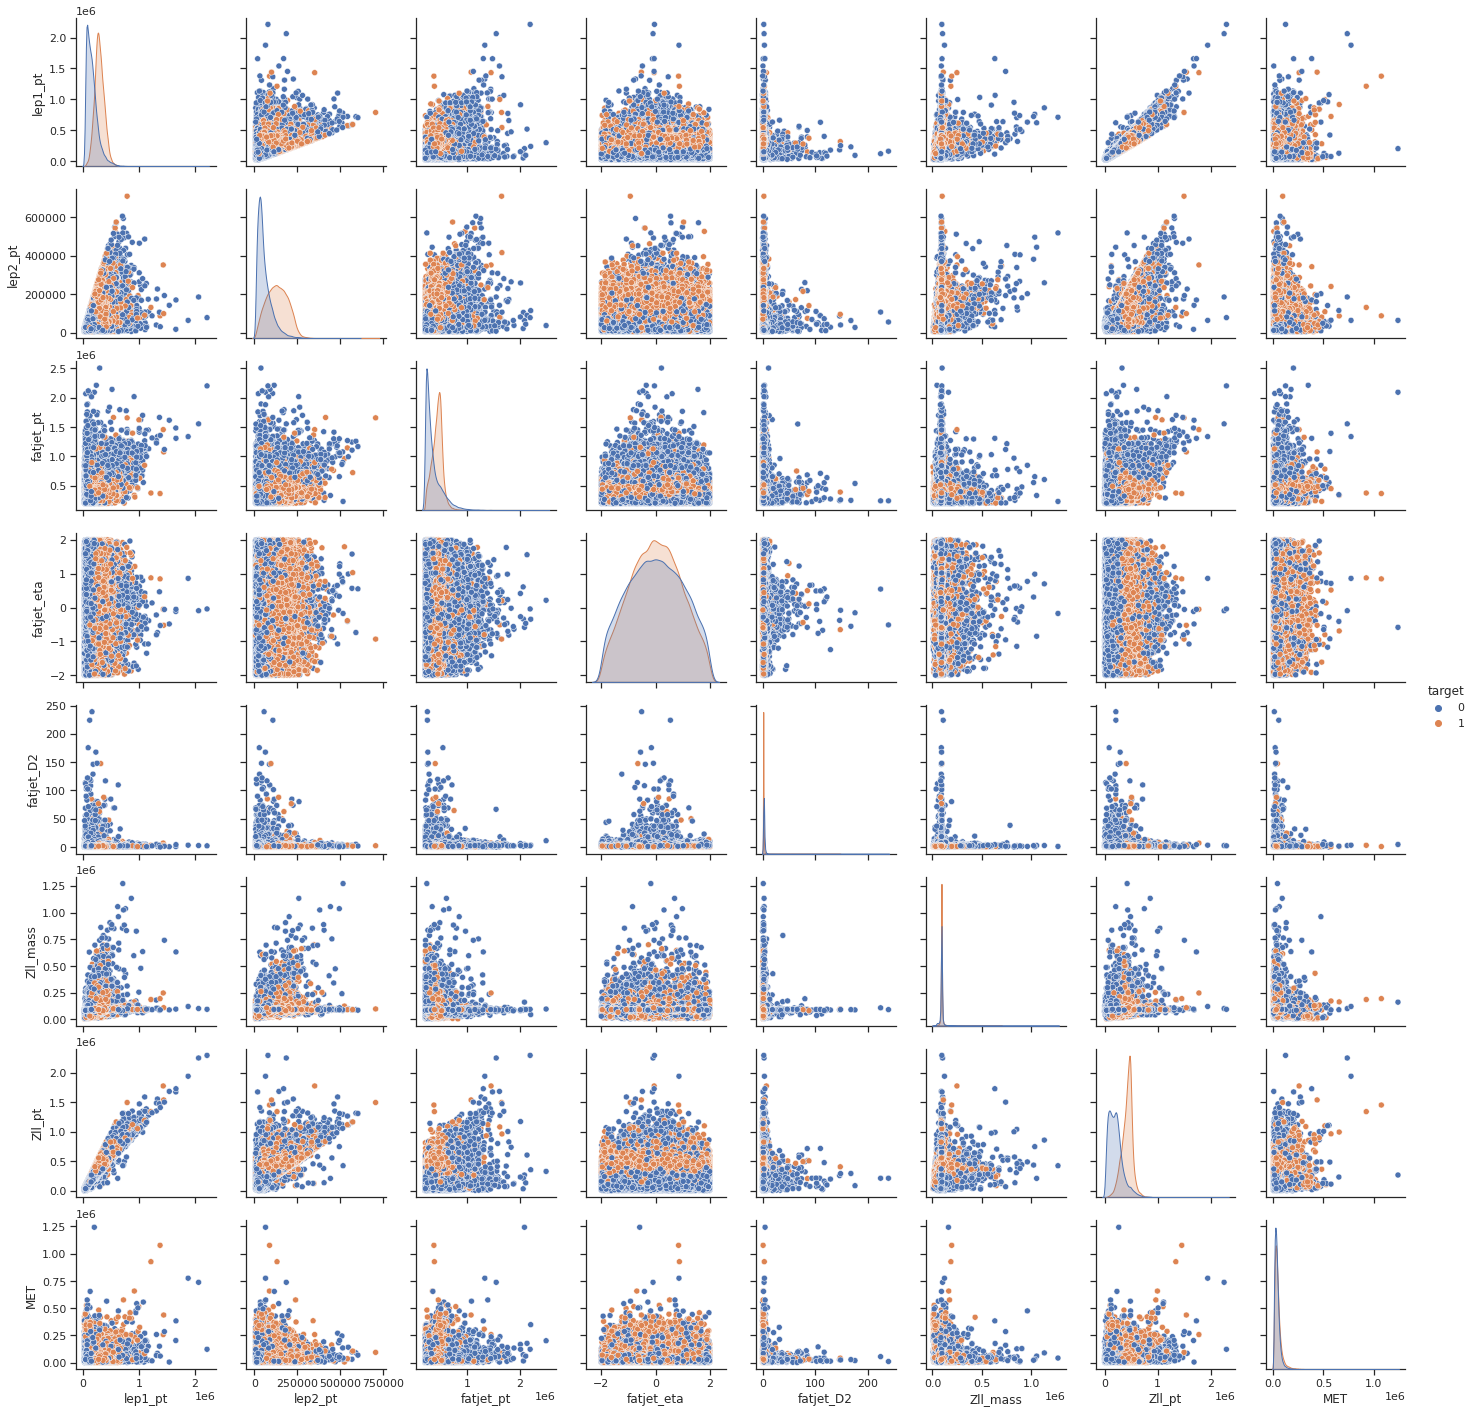

In [117]:
#plot all variables against eachother
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(training, hue="target")

In [39]:
from sklearn import datasets, tree, metrics, model_selection, ensemble
#from sklearn.externals.six import StringIO
from six import StringIO
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from IPython.display import Image
from mpl_toolkits.mplot3d import Axes3D
#import pydotplus
import itertools
import seaborn as sns

### TASK 3

In [40]:
training

,lep1_pt,lep2_pt,fatjet_pt,fatjet_eta,fatjet_D2,Zll_mass,Zll_pt,MET
39389,236095.83,223591.6700,471153.53,-1.278958,1.428814,85647.080,451638.40,32944.5600
32431,280150.56,232889.7800,450749.06,-0.891372,0.625325,89382.484,506066.84,15525.5140
69018,292778.30,7139.7744,223536.55,-0.006066,2.369304,98248.234,299659.40,47393.0900
49834,303353.16,170069.7800,496729.30,-0.595946,0.711557,89189.390,473213.72,57355.2800
76027,199660.81,43907.5500,763084.60,0.982800,1.443126,86146.016,229531.94,70204.8050
...,...,...,...,...,...,...,...,...
6265,390174.34,70919.0300,436243.97,-0.072294,0.359615,108599.360,450300.88,38838.6170
54886,152527.38,113681.1700,400275.72,1.021868,2.221449,93097.580,265172.28,12576.9000
76820,355630.40,13075.7010,324245.44,0.176000,2.503385,88122.930,368613.70,3960.8594
860,360028.78,182593.4000,515074.75,0.442022,2.344393,81439.720,540881.30,19964.4300


In [41]:
target

39389    1
32431    1
69018    0
49834    1
76027    0
        ..
6265     1
54886    0
76820    0
860      1
15795    1
Name: isSignal, Length: 100026, dtype: int64

In [42]:
#split mega dataset into test and train
from sklearn import model_selection, preprocessing
sc = preprocessing.StandardScaler ()
input_data = sc.fit_transform ( training )
# set random seed
Answer_to_all_questions = 42
# train - test split of dataset
train_data, test_data, train_target, test_target = model_selection.train_test_split (\
input_data , target , test_size =0.3 , random_state = Answer_to_all_questions )
print ( train_data . shape , train_target . shape , test_data . shape , test_target . shape )

(70018, 8) (70018,) (30008, 8) (30008,)


### TASK 4

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow . keras . layers import Dense
from tensorflow . keras . layers import Dropout

In [48]:
def my_model(num_inputs, num_nodes, extra_depth):
    # create model
    num_outputs = 1
    model = Sequential()
    model.add(Dense(num_nodes, input_dim = num_inputs, kernel_initializer ='normal', activation ='relu'))
    model.add(Dropout(0.2))
    for i in range(extra_depth):
    # code up the extra layers here
        model.add(Dense(num_outputs, activation ='sigmoid'))
    # Compile model
        model.compile(loss ='binary_crossentropy', optimizer ='adam', metrics =['accuracy'])
    return model

In [51]:
batchSize = 500
N_epochs = 50

In [52]:
#generate model
model = my_model(8, 20, 1)

In [53]:
history = model.fit(train_data, train_target, batch_size = batchSize, epochs = N_epochs, \
verbose =1, validation_data =( test_data, test_target ))

2022-03-16 12:57:14.129788: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-16 12:57:14.159309: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2893245000 Hz


Epoch 1/50
141/141 [==============================] - 1s 2ms/step - loss: 0.5862 - accuracy: 0.7965 - val_loss: 0.3854 - val_accuracy: 0.8649
Epoch 2/50
141/141 [==============================] - 0s 1ms/step - loss: 0.3672 - accuracy: 0.8698 - val_loss: 0.3264 - val_accuracy: 0.8758
Epoch 3/50
141/141 [==============================] - 0s 1ms/step - loss: 0.3273 - accuracy: 0.8730 - val_loss: 0.3080 - val_accuracy: 0.8786
Epoch 4/50
141/141 [==============================] - 0s 2ms/step - loss: 0.3123 - accuracy: 0.8756 - val_loss: 0.2985 - val_accuracy: 0.8808
Epoch 5/50
141/141 [==============================] - 0s 2ms/step - loss: 0.3094 - accuracy: 0.8759 - val_loss: 0.2938 - val_accuracy: 0.8821
Epoch 6/50
141/141 [==============================] - 0s 2ms/step - loss: 0.3032 - accuracy: 0.8775 - val_loss: 0.2913 - val_accuracy: 0.8825
Epoch 7/50
141/141 [==============================] - 0s 2ms/step - loss: 0.3052 - accuracy: 0.8785 - val_loss: 0.2903 - val_accuracy: 0.8834
Epoch 

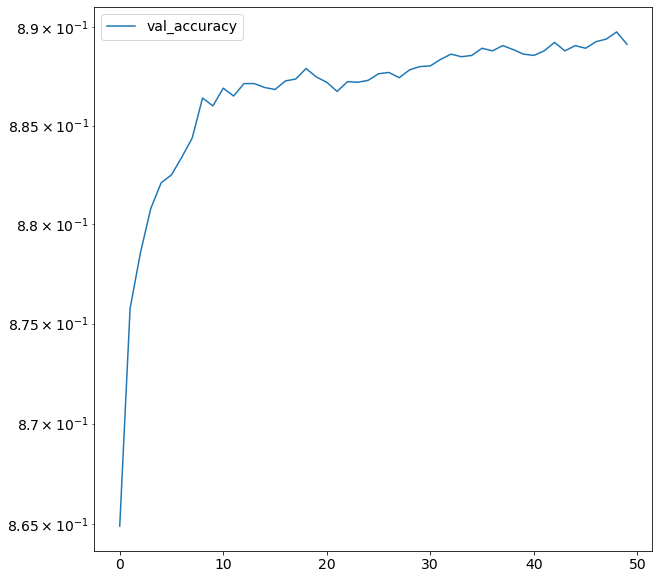

In [67]:
#plot val accuracy and loss
plt.yscale('log')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()

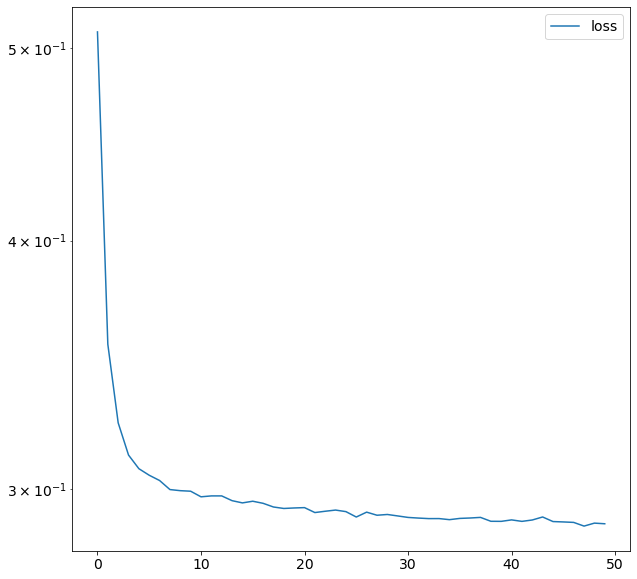

In [66]:
plt.yscale('log')
plt.plot(history.history['loss'],label='loss')
plt.legend()

### Task 5

In [126]:
#ADD RECO MASS BACK IN
training_new = pd.concat([sig_H, bkg_samples], ignore_index=True)
training_new = sklearn.utils.shuffle(training_new, random_state=42)

In [127]:
training_new

,lep1_pt,lep2_pt,fatjet_pt,fatjet_eta,fatjet_D2,Zll_mass,Zll_pt,MET,reco_zv_mass,isSignal
39389,236095.83,223591.6700,471153.53,-1.278958,1.428814,85647.080,451638.40,32944.5600,954156.40,1
32431,280150.56,232889.7800,450749.06,-0.891372,0.625325,89382.484,506066.84,15525.5140,976539.25,1
69018,292778.30,7139.7744,223536.55,-0.006066,2.369304,98248.234,299659.40,47393.0900,536788.75,0
49834,303353.16,170069.7800,496729.30,-0.595946,0.711557,89189.390,473213.72,57355.2800,986375.30,1
76027,199660.81,43907.5500,763084.60,0.982800,1.443126,86146.016,229531.94,70204.8050,1059215.20,0
...,...,...,...,...,...,...,...,...,...,...
6265,390174.34,70919.0300,436243.97,-0.072294,0.359615,108599.360,450300.88,38838.6170,923796.94,1
54886,152527.38,113681.1700,400275.72,1.021868,2.221449,93097.580,265172.28,12576.9000,961342.30,0
76820,355630.40,13075.7010,324245.44,0.176000,2.503385,88122.930,368613.70,3960.8594,811227.80,0
860,360028.78,182593.4000,515074.75,0.442022,2.344393,81439.720,540881.30,19964.4300,1091936.50,1


In [128]:
training_new.reset_index(drop=True)
#drop signal boolean
training_new.drop(training_new.columns[-1], axis=1, inplace=True)

In [156]:
def my_model2(num_inputs, num_nodes, extra_depth):
    # create model
    num_outputs = 1
    model = Sequential()
    model.add(Dense(num_nodes, input_dim = num_inputs, kernel_initializer ='normal', activation ='relu'))
    model.add(Dropout(0.2))
    #model.add(LeakyReLU(alpha=0.1))

    for i in range(extra_depth):
    # code up the extra layers here
        model.add(Dense(num_outputs, activation ='sigmoid'))

        #model.add(Dropout(0.1))

    # Compile model
        model.compile(loss ='binary_crossentropy', optimizer ='adam', metrics =['accuracy'])
    return model

In [157]:
input_data = sc.fit_transform ( training_new )
# set random seed
Answer_to_all_questions = 42
# train - test split of dataset
train_data, test_data, train_target, test_target = model_selection.train_test_split (\
input_data , target , test_size =0.3 , random_state = Answer_to_all_questions )
print ( train_data . shape , train_target . shape , test_data . shape , test_target . shape )

(70018, 9) (70018,) (30008, 9) (30008,)


In [158]:
#2 DENSE LAYERS 100 NODES
model = my_model2(9, 100, 2)

In [159]:
history = model.fit(train_data, train_target, batch_size = batchSize, epochs = N_epochs, \
verbose =1, validation_data =( test_data, test_target ))

Epoch 1/50
141/141 [==============================] - 1s 3ms/step - loss: 0.6499 - accuracy: 0.5354 - val_loss: 0.5277 - val_accuracy: 0.8525
Epoch 2/50
141/141 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.8691 - val_loss: 0.4898 - val_accuracy: 0.8906
Epoch 3/50
141/141 [==============================] - 0s 2ms/step - loss: 0.4835 - accuracy: 0.8912 - val_loss: 0.4642 - val_accuracy: 0.8959
Epoch 4/50
141/141 [==============================] - 0s 2ms/step - loss: 0.4599 - accuracy: 0.8957 - val_loss: 0.4437 - val_accuracy: 0.8991
Epoch 5/50
141/141 [==============================] - 0s 2ms/step - loss: 0.4395 - accuracy: 0.8985 - val_loss: 0.4263 - val_accuracy: 0.9001
Epoch 6/50
141/141 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.8984 - val_loss: 0.4104 - val_accuracy: 0.9013
Epoch 7/50
141/141 [==============================] - 0s 2ms/step - loss: 0.4075 - accuracy: 0.9011 - val_loss: 0.3954 - val_accuracy: 0.9050
Epoch 

In [153]:
history = model.fit(train_data, train_target, batch_size = batchSize, epochs = N_epochs, \
verbose =1, validation_data =( test_data, test_target ))

Epoch 1/50
141/141 [==============================] - 1s 3ms/step - loss: 0.6683 - accuracy: 0.5856 - val_loss: 0.6137 - val_accuracy: 0.8775
Epoch 2/50
141/141 [==============================] - 0s 2ms/step - loss: 0.6057 - accuracy: 0.8791 - val_loss: 0.5817 - val_accuracy: 0.8909
Epoch 3/50
141/141 [==============================] - 0s 2ms/step - loss: 0.5753 - accuracy: 0.8910 - val_loss: 0.5553 - val_accuracy: 0.8970
Epoch 4/50
141/141 [==============================] - 0s 2ms/step - loss: 0.5509 - accuracy: 0.8955 - val_loss: 0.5317 - val_accuracy: 0.9008
Epoch 5/50
141/141 [==============================] - 0s 2ms/step - loss: 0.5268 - accuracy: 0.9004 - val_loss: 0.5086 - val_accuracy: 0.9073
Epoch 6/50
141/141 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.9082 - val_loss: 0.4826 - val_accuracy: 0.9199
Epoch 7/50
141/141 [==============================] - 0s 2ms/step - loss: 0.4767 - accuracy: 0.9223 - val_loss: 0.4576 - val_accuracy: 0.9297
Epoch 

In [154]:
### Exercise 5
from tensorflow . keras . callbacks import EarlyStopping , ModelCheckpoint
callbacks_ = [
# if we don ’t have an increase of the accuracy for 10 epochs , terminate training .
EarlyStopping ( verbose = True , patience =10 , monitor ='val_acc') ,
# Always make sure that we ’re saving the model weights with the best accuracy .
ModelCheckpoint ('model.h5', monitor ='val_acc', verbose =0 , save_best_only = True , mode ='max')]
history = model . fit ( train_data , train_target , batch_size = batchSize , epochs = N_epochs , \
verbose =1 , validation_data =( test_data , test_target ) , callbacks = callbacks_ )

Epoch 1/50
141/141 [==============================] - 0s 2ms/step - loss: 0.1975 - accuracy: 0.9400 - val_loss: 0.1937 - val_accuracy: 0.9412
Epoch 2/50
141/141 [==============================] - 0s 2ms/step - loss: 0.1961 - accuracy: 0.9399 - val_loss: 0.1923 - val_accuracy: 0.9416
Epoch 3/50
141/141 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.9403 - val_loss: 0.1913 - val_accuracy: 0.9415
Epoch 4/50
141/141 [==============================] - 0s 3ms/step - loss: 0.1938 - accuracy: 0.9404 - val_loss: 0.1903 - val_accuracy: 0.9419
Epoch 5/50
141/141 [==============================] - 0s 2ms/step - loss: 0.1940 - accuracy: 0.9395 - val_loss: 0.1900 - val_accuracy: 0.9417
Epoch 6/50
141/141 [==============================] - 0s 3ms/step - loss: 0.1920 - accuracy: 0.9400 - val_loss: 0.1884 - val_accuracy: 0.9415
Epoch 7/50
141/141 [==============================] - 0s 2ms/step - loss: 0.1910 - accuracy: 0.9404 - val_loss: 0.1873 - val_accuracy: 0.9417
Epoch 

141/141 [==============================] - 0s 2ms/step - loss: 0.1818 - accuracy: 0.9408 - val_loss: 0.1789 - val_accuracy: 0.9415
Epoch 24/50
141/141 [==============================] - 0s 2ms/step - loss: 0.1827 - accuracy: 0.9408 - val_loss: 0.1779 - val_accuracy: 0.9424
Epoch 25/50
141/141 [==============================] - 0s 2ms/step - loss: 0.1814 - accuracy: 0.9408 - val_loss: 0.1778 - val_accuracy: 0.9424
Epoch 26/50
141/141 [==============================] - 0s 2ms/step - loss: 0.1811 - accuracy: 0.9407 - val_loss: 0.1772 - val_accuracy: 0.9421
Epoch 27/50
141/141 [==============================] - 0s 2ms/step - loss: 0.1807 - accuracy: 0.9408 - val_loss: 0.1770 - val_accuracy: 0.9421
Epoch 28/50
141/141 [==============================] - 0s 2ms/step - loss: 0.1789 - accuracy: 0.9412 - val_loss: 0.1773 - val_accuracy: 0.9418
Epoch 29/50
141/141 [==============================] - 0s 2ms/step - loss: 0.1797 - accuracy: 0.9410 - val_loss: 0.1774 - val_accuracy: 0.9414
Epoch 30/50

141/141 [==============================] - 0s 2ms/step - loss: 0.1745 - accuracy: 0.9416 - val_loss: 0.1718 - val_accuracy: 0.9426
Epoch 46/50
141/141 [==============================] - 0s 2ms/step - loss: 0.1748 - accuracy: 0.9415 - val_loss: 0.1726 - val_accuracy: 0.9424
Epoch 47/50
141/141 [==============================] - 0s 2ms/step - loss: 0.1752 - accuracy: 0.9413 - val_loss: 0.1715 - val_accuracy: 0.9430
Epoch 48/50
141/141 [==============================] - 0s 3ms/step - loss: 0.1749 - accuracy: 0.9407 - val_loss: 0.1713 - val_accuracy: 0.9430
Epoch 49/50
141/141 [==============================] - 0s 2ms/step - loss: 0.1741 - accuracy: 0.9421 - val_loss: 0.1710 - val_accuracy: 0.9429
Epoch 50/50
141/141 [==============================] - 0s 2ms/step - loss: 0.1732 - accuracy: 0.9414 - val_loss: 0.1709 - val_accuracy: 0.9425


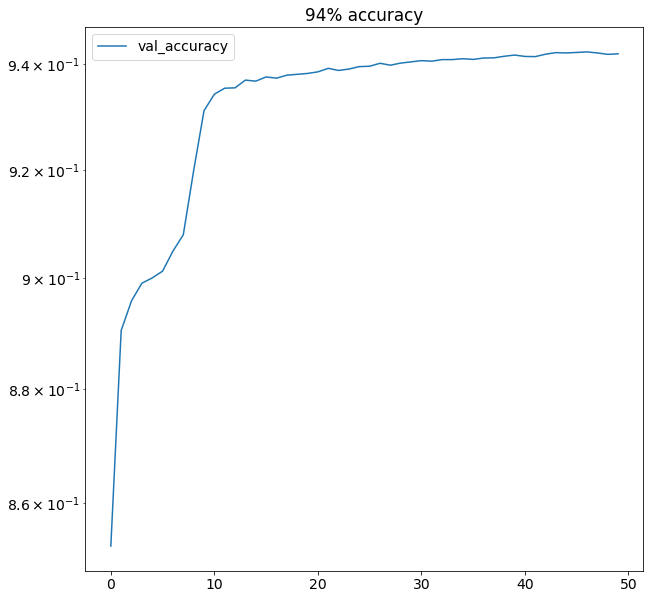

In [160]:
#best classification
plt.yscale('log')
plt.title('94% accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()

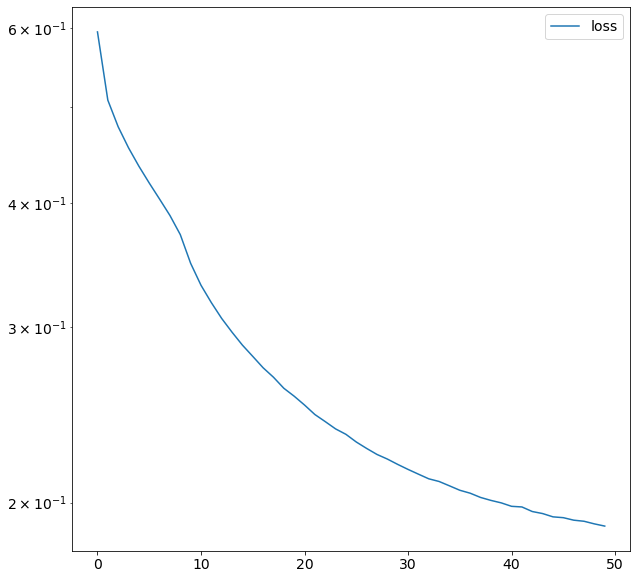

In [161]:
#best classification gives
plt.yscale('log')
plt.plot(history.history['loss'],label='loss')
plt.legend()

### PART 6

In [179]:
from sklearn.metrics import confusion_matrix

In [163]:
#get predictions from model
y_pred = model.predict(test_data)

In [173]:
predicted = []
for i in range(len(y_pred)):
    if np.array(y_pred)[i]>=0.5:
        predicted.append(1)
    else:
        predicted.append(0)

In [174]:
test_target

99377    0
49197    1
97915    0
18125    1
74627    0
        ..
37409    1
36591    1
63825    0
67055    0
97319    0
Name: isSignal, Length: 30008, dtype: int64

In [175]:
predicted

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,


In [184]:
cf_matrix = confusion_matrix(test_target,predicted, labels=None, sample_weight=None, normalize='true')

In [182]:
column_names = ['lep1_pt','lep2_pt','fatjet_pt','fatjet_eta','fatjet_D2','Zll_mass','Zll_pt','MET','reco_zv_mass']


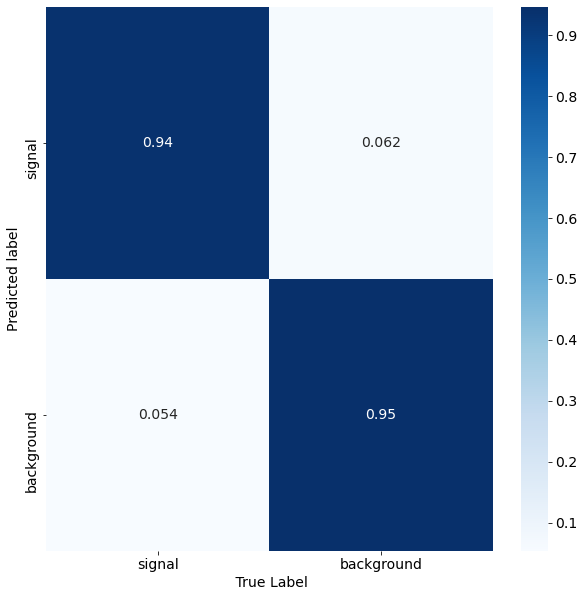

In [186]:
sns.heatmap(cf_matrix, annot=True, cmap='Blues',xticklabels=['signal','background'], yticklabels=['signal','background'])
plt.xlabel(" True Label",fontsize=14)
plt.ylabel("Predicted label",fontsize=14)
plt.show()

In [188]:
#background was predicted with 95% accuracy and signal with 94% accuracy

In [187]:
sklearn.metrics.roc_curve(test_target, predicted)

(array([0.        , 0.06236244, 1.        ]),
 array([0.        , 0.94612055, 1.        ]),
 array([2, 1, 0]))